# **Setup**

* https://www.youtube.com/watch?v=eMOA1pPVUc4

In [185]:
import pandas as pd 
import numpy as np

# **Task 01**

* Read & Merge All Monthly Data Files Into A Dataframe

In [186]:
# Sample File
df = pd.read_csv('Input Data/Sales Analysis/Sales_Data/Sales_April_2019.csv')

print(df.shape)
df.head()

(18383, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [187]:
# Get List Of All Data Files
import os
File_List = os.listdir('Input Data/Sales Analysis/Sales_Data')

print('No. Of Files: ',len(File_List))
File_List

No. Of Files:  12


['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [188]:
# Create Empty Dataframe
df = pd.DataFrame()
print('Initial Dataframe Shape: ',df.shape,'\n')

# Read & Merge All Files
Folder_Path = 'Input Data/Sales Analysis/Sales_Data' 

for file in File_List:
    print(f'Reading File: {file}!')
    File_Path = Folder_Path + '/' + file
    if df.shape == (0,0):
        df = pd.read_csv(File_Path)
        print('Dataframe Shape: ',df.shape,'\n')
    else:
        df_new = pd.read_csv(File_Path) 
        if df.shape[1] == df_new.shape[1]:
            df = pd.concat([df,df_new],axis=0)
            print('Dataframe Shape: ',df.shape,'\n')
        else:
            print('File Shape Mismatch !')

Initial Dataframe Shape:  (0, 0) 

Reading File: Sales_April_2019.csv!
Dataframe Shape:  (18383, 6) 

Reading File: Sales_August_2019.csv!
Dataframe Shape:  (30394, 6) 

Reading File: Sales_December_2019.csv!
Dataframe Shape:  (55511, 6) 

Reading File: Sales_February_2019.csv!
Dataframe Shape:  (67547, 6) 

Reading File: Sales_January_2019.csv!
Dataframe Shape:  (77270, 6) 

Reading File: Sales_July_2019.csv!
Dataframe Shape:  (91641, 6) 

Reading File: Sales_June_2019.csv!
Dataframe Shape:  (105263, 6) 

Reading File: Sales_March_2019.csv!
Dataframe Shape:  (120489, 6) 

Reading File: Sales_May_2019.csv!
Dataframe Shape:  (137124, 6) 

Reading File: Sales_November_2019.csv!
Dataframe Shape:  (154785, 6) 

Reading File: Sales_October_2019.csv!
Dataframe Shape:  (175164, 6) 

Reading File: Sales_September_2019.csv!
Dataframe Shape:  (186850, 6) 



In [189]:
# Export The New Dataframe To CSV
df.to_csv('Merged_Monthly_Data.csv',index=False)

In [190]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [191]:
df_01 = pd.read_csv('Merged_Monthly_Data.csv')
df_01.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# **Data Cleaning**

In [192]:
# Check For Missing Values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [193]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
print('Dataframe Shape Before: ',df.shape)

# Drop NA Values
df.dropna(how='all',inplace=True)
print('Dataframe Shape After: ',df.shape)

Dataframe Shape Before:  (186850, 6)
Dataframe Shape After:  (186305, 6)


In [195]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [196]:
print('Dataframe Shape Before: ',df.shape)

# Drop Duplicates
df.drop_duplicates(inplace=True)
print('Dataframe Shape After: ',df.shape)

Dataframe Shape Before:  (186305, 6)
Dataframe Shape After:  (185687, 6)


In [197]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [198]:
# Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [199]:
# Rename Column
df.rename({'Order ID':'Order_ID','Quantity Ordered':'QTY','Price Each':'Unit_Price',
           'Order Date':'Order_Date',
           'Purchase Address':'Address'},axis=1,inplace=True)
df.columns

Index(['Order_ID', 'Product', 'QTY', 'Unit_Price', 'Order_Date', 'Address'], dtype='object')

In [200]:
# Convert Data Types
df['Order ID'] = df['Order ID'].astype('int')
df['Order ID'].info()

KeyError: 'Order ID'

In [201]:
# Check Rows Where Order_ID Column Values Are Not Integers
df[df['Order_ID'] == 'Order ID']

,Order_ID,Product,QTY,Unit_Price,Order_Date,Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [202]:
# Remove Rows Where Order_ID Column Values Are Not Integers
print('Dataframe Shape Before: ',df.shape)
df = df[df['Order_ID'] != 'Order ID']
print('Dataframe Shape After: ',df.shape)

Dataframe Shape Before:  (185687, 6)
Dataframe Shape After:  (185686, 6)


In [203]:
# Convert Data Types
df['Order_ID'] = df['Order_ID'].astype('int')
df['Order_ID'].info()

<class 'pandas.core.series.Series'>
Index: 185686 entries, 0 to 11685
Series name: Order_ID
Non-Null Count   Dtype
--------------   -----
185686 non-null  int32
dtypes: int32(1)
memory usage: 2.1 MB


C:\Users\aksha\AppData\Local\Temp\ipykernel_7164\1591035576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_ID'] = df['Order_ID'].astype('int')


In [204]:
# Convert Data Types
df['QTY'] = df['QTY'].astype('int').copy()
df['QTY'].info()

<class 'pandas.core.series.Series'>
Index: 185686 entries, 0 to 11685
Series name: QTY
Non-Null Count   Dtype
--------------   -----
185686 non-null  int32
dtypes: int32(1)
memory usage: 2.1 MB


C:\Users\aksha\AppData\Local\Temp\ipykernel_7164\3217866793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QTY'] = df['QTY'].astype('int').copy()


In [205]:
# Convert Data Types
df['Unit_Price'] = df['Unit_Price'].astype('float').copy()
df['Unit_Price'].info()

<class 'pandas.core.series.Series'>
Index: 185686 entries, 0 to 11685
Series name: Unit_Price
Non-Null Count   Dtype  
--------------   -----  
185686 non-null  float64
dtypes: float64(1)
memory usage: 2.8 MB


C:\Users\aksha\AppData\Local\Temp\ipykernel_7164\4042161531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unit_Price'] = df['Unit_Price'].astype('float').copy()


In [206]:
df.head()

,Order_ID,Product,QTY,Unit_Price,Order_Date,Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [207]:
# Convert Data Types
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%y %H:%M')
df['Order_Date'].info()

<class 'pandas.core.series.Series'>
Index: 185686 entries, 0 to 11685
Series name: Order_Date
Non-Null Count   Dtype         
--------------   -----         
185686 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 MB


C:\Users\aksha\AppData\Local\Temp\ipykernel_7164\1065891224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%y %H:%M')


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Order_ID    185686 non-null  int32         
 1   Product     185686 non-null  object        
 2   QTY         185686 non-null  int32         
 3   Unit_Price  185686 non-null  float64       
 4   Order_Date  185686 non-null  datetime64[ns]
 5   Address     185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 8.5+ MB


In [209]:
# Sort Data
df.sort_values(by='Order_Date',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_7164\281528655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Order_Date',ascending=True,inplace=True)


,Order_ID,Product,QTY,Unit_Price,Order_Date,Address
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"


# **Task 02**

* What was the best month for sales?
* How much was earned that month ?

In [210]:
df.head()

,Order_ID,Product,QTY,Unit_Price,Order_Date,Address
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"


In [211]:
# Create A Column For Total Sales
df['Order_Value'] = df['QTY'] * df['Unit_Price']
df.head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_7164\1195433591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Value'] = df['QTY'] * df['Unit_Price']


,Order_ID,Product,QTY,Unit_Price,Order_Date,Address,Order_Value
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90


In [214]:
# Reorder Columns
df = df.loc[:,['Order_ID','Product','QTY','Unit_Price','Order_Value','Order_Date','Address',]]
df.head()

,Order_ID,Product,QTY,Unit_Price,Order_Value,Order_Date,Address
0,147268,Wired Headphones,1,11.99,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150.00,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,23.90,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"


In [225]:
# Add Month Column
df['Month'] = df['Order_Date'].dt.month_name()
df.head()

,Order_ID,Product,QTY,Unit_Price,Order_Value,Order_Date,Address,Month
0,147268,Wired Headphones,1,11.99,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January
1,148041,USB-C Charging Cable,1,11.95,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January
2,149343,Apple Airpods Headphones,1,150.00,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January
3,149964,AAA Batteries (4-pack),1,2.99,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January
4,149350,USB-C Charging Cable,2,11.95,23.90,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January


In [224]:
# Highest Sales
df.groupby(pd.Grouper(key='Order_Date',freq='m')).sum().loc[:,['QTY','Order_Value']].sort_values(by='Order_Value',ascending=False).head(1)

,QTY,Order_Value
Order_Date,,
2019-12-31,28074,4608295.7


In [245]:
# Highest Sales
result = df.drop('Order_Date',axis=1).groupby('Month').sum().loc[:,['QTY','Order_Value']].sort_values('Order_Value',ascending=False)
result.head(1)

,QTY,Order_Value
Month,,
December,28074,4608295.7


<Axes: xlabel='Month', ylabel='Order_Value'>

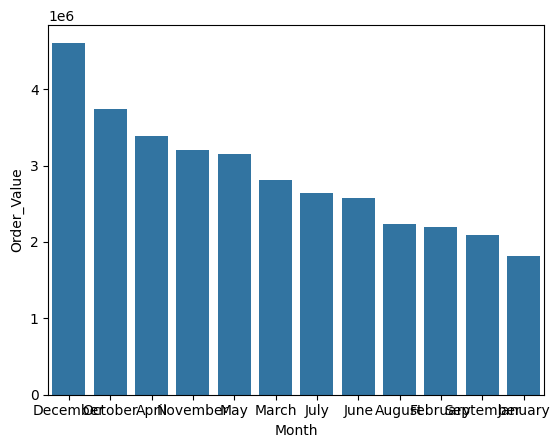

In [247]:
import seaborn as sns
sns.barplot(result,x='Month',y='Order_Value')

# **Task 03**

Which City Had the highest sales ?

In [248]:
df.head()

,Order_ID,Product,QTY,Unit_Price,Order_Value,Order_Date,Address,Month
0,147268,Wired Headphones,1,11.99,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January
1,148041,USB-C Charging Cable,1,11.95,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January
2,149343,Apple Airpods Headphones,1,150.00,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January
3,149964,AAA Batteries (4-pack),1,2.99,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January
4,149350,USB-C Charging Cable,2,11.95,23.90,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January


In [256]:
# Add A City Column
df['City'] = df['Address'].apply(lambda x: str(x).split(',')[1]+' '+(str(x).split(', ')[2]).split(' ')[0])
df['City']

0          New York City NY
1          San Francisco CA
2          New York City NY
3                 Dallas TX
4                Atlanta GA
                ...        
185681          Portland OR
185682     New York City NY
185683     San Francisco CA
185684     New York City NY
185685     New York City NY
Name: City, Length: 185686, dtype: object

In [257]:
df.head()

,Order_ID,Product,QTY,Unit_Price,Order_Value,Order_Date,Address,Month,City
0,147268,Wired Headphones,1,11.99,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,New York City NY
1,148041,USB-C Charging Cable,1,11.95,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,San Francisco CA
2,149343,Apple Airpods Headphones,1,150.00,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,New York City NY
3,149964,AAA Batteries (4-pack),1,2.99,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,Dallas TX
4,149350,USB-C Charging Cable,2,11.95,23.90,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,Atlanta GA


In [261]:
# Group By 'City'
df.drop('Order_Date',axis=1).groupby('City').sum().loc[:,['QTY','Order_Value']].sort_values('Order_Value',ascending=False)

,QTY,Order_Value
City,,
San Francisco CA,50169,8254743.55
Los Angeles CA,33247,5448304.28
New York City NY,27903,4661867.14
Boston MA,22494,3658627.65
Atlanta GA,16584,2794199.07
Dallas TX,16707,2765373.96
Seattle WA,16534,2745046.02
Portland OR,11291,1870010.56
Austin TX,11137,1818044.33


# **Task 04**

What time should we advertise to maximize the likelihood of sales ?

In [262]:
df.head()

,Order_ID,Product,QTY,Unit_Price,Order_Value,Order_Date,Address,Month,City
0,147268,Wired Headphones,1,11.99,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,New York City NY
1,148041,USB-C Charging Cable,1,11.95,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,San Francisco CA
2,149343,Apple Airpods Headphones,1,150.00,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,New York City NY
3,149964,AAA Batteries (4-pack),1,2.99,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,Dallas TX
4,149350,USB-C Charging Cable,2,11.95,23.90,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,Atlanta GA


In [264]:
df['Hour'] = df['Order_Date'].dt.hour
df['Minute'] = df['Order_Date'].dt.minute
df.head()

,Order_ID,Product,QTY,Unit_Price,Order_Value,Order_Date,Address,Month,City,Hour,Minute
0,147268,Wired Headphones,1,11.99,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,New York City NY,3,7
1,148041,USB-C Charging Cable,1,11.95,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,San Francisco CA,3,40
2,149343,Apple Airpods Headphones,1,150.00,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,New York City NY,4,56
3,149964,AAA Batteries (4-pack),1,2.99,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,Dallas TX,5,53
4,149350,USB-C Charging Cable,2,11.95,23.90,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,Atlanta GA,6,3


In [281]:
result_02 = df.drop('Order_Date',axis=1).groupby('Hour').sum().loc[:,['QTY']]
result_02.head()

,QTY
Hour,
0,4420
1,2616
2,1397
3,927
4,935


<function matplotlib.pyplot.show(close=None, block=None)>

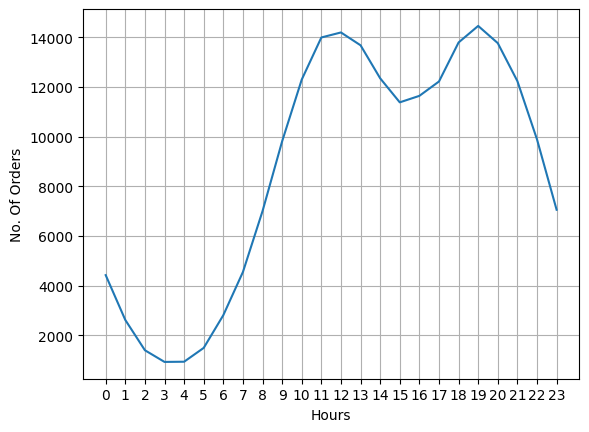

In [285]:
import matplotlib.pyplot as plt
plt.plot(result_02['QTY'])
plt.xlabel('Hours')
plt.ylabel("No. Of Orders")
plt.xticks(result_02.index)
plt.grid()
plt.show

In [ ]:
# Best Time For Advertising is around 11 AM or 7 PM

# **Task 05**

* What products are often sold together ?

In [286]:
df.head()

,Order_ID,Product,QTY,Unit_Price,Order_Value,Order_Date,Address,Month,City,Hour,Minute
0,147268,Wired Headphones,1,11.99,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,New York City NY,3,7
1,148041,USB-C Charging Cable,1,11.95,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,San Francisco CA,3,40
2,149343,Apple Airpods Headphones,1,150.00,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,New York City NY,4,56
3,149964,AAA Batteries (4-pack),1,2.99,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,Dallas TX,5,53
4,149350,USB-C Charging Cable,2,11.95,23.90,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,Atlanta GA,6,3


In [291]:
df.shape

(185686, 11)

In [321]:
# Order ID can be used to identify items ordered together
# Create a Dataframe of order ID that are associated with more than 1 products

df02 = df[df['Order_ID'].duplicated(keep=False)].sort_values(by='Order_ID',ascending=True)
print(df_02.shape)
df02.head()

(14128, 11)


,Order_ID,Product,QTY,Unit_Price,Order_Value,Order_Date,Address,Month,City,Hour,Minute
2001,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",January,Austin TX,16,6
2000,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",January,Austin TX,16,6
328,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",January,Los Angeles CA,8,25
329,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",January,Los Angeles CA,8,25
2804,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",January,New York City NY,11,19


In [322]:
df02['Combined_Order'] = df02.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))
df02.drop(['Product','QTY','Unit_Price','Order_Value','Order_Date','Address','Month','City','Hour','Minute'],axis=1,inplace=True)
df02.drop_duplicates(inplace=True)
df02.head()

,Order_ID,Combined_Order
2001,141275,"USB-C Charging Cable,Wired Headphones"
328,141290,"AA Batteries (4-pack),Apple Airpods Headphones"
2804,141365,"Vareebadd Phone,Wired Headphones"
629,141384,"USB-C Charging Cable,Google Phone"
3470,141450,"Bose SoundSport Headphones,Google Phone"


In [325]:
print('Data Shape: ',df02.shape)
print('No. Of Unique Order ID: ',df02['Order_ID'].nunique())
print('No. Of Unique Combined_Orders: ',df02['Combined_Order'].nunique())

Data Shape:  (6879, 2)
No. Of Unique Order ID:  6879
No. Of Unique Combined_Orders:  404


In [330]:
# Get Groupby Count Of Order_ID
df02.groupby('Combined_Order').count().sort_values('Order_ID',ascending=False)

,Order_ID
Combined_Order,
"Google Phone,USB-C Charging Cable",460
"iPhone,Lightning Charging Cable",454
"Lightning Charging Cable,iPhone",441
"USB-C Charging Cable,Google Phone",409
"Wired Headphones,iPhone",199
...,...
"USB-C Charging Cable,iPhone,Lightning Charging Cable",1
"LG Dryer,Wired Headphones",1
"LG Washing Machine,20in Monitor",1


# **Task 06**

* What Product Sold the Most ? Why do you think it sold the most ?

In [331]:
df.head()

,Order_ID,Product,QTY,Unit_Price,Order_Value,Order_Date,Address,Month,City,Hour,Minute
0,147268,Wired Headphones,1,11.99,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,New York City NY,3,7
1,148041,USB-C Charging Cable,1,11.95,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,San Francisco CA,3,40
2,149343,Apple Airpods Headphones,1,150.00,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,New York City NY,4,56
3,149964,AAA Batteries (4-pack),1,2.99,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,Dallas TX,5,53
4,149350,USB-C Charging Cable,2,11.95,23.90,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,Atlanta GA,6,3


In [333]:
# No. Of Unique Products For Sale
print("No. Of Unique Products: ",df['Product'].nunique())
df['Product'].unique()

No. Of Unique Products:  19


array(['Wired Headphones', 'USB-C Charging Cable',
       'Apple Airpods Headphones', 'AAA Batteries (4-pack)', 'iPhone',
       'Lightning Charging Cable', '34in Ultrawide Monitor',
       'AA Batteries (4-pack)', 'Google Phone', 'Macbook Pro Laptop',
       'ThinkPad Laptop', '27in FHD Monitor',
       'Bose SoundSport Headphones', 'Flatscreen TV',
       '27in 4K Gaming Monitor', 'LG Dryer', '20in Monitor',
       'LG Washing Machine', 'Vareebadd Phone'], dtype=object)

In [349]:
# Group By Product & Get Order Count
df03 = df.loc[:,['Order_ID','Product','QTY','Order_Value']].copy()

# Aggregate Function
df03.groupby('Product').count().sort_values('Order_ID',ascending=False,inplace=True)
df03 = df03.groupby('Product').agg({'Order_ID':['count'],'QTY':['sum'],'Order_Value':['sum']})
print(df03.columns)

MultiIndex([(   'Order_ID', 'count'),
            (        'QTY',   'sum'),
            ('Order_Value',   'sum')],
           )


In [350]:
# Products With Highest Order QTY - Multi-Index Sorting
df03.sort_values(by=('QTY','sum'),ascending=False)

,Order_ID,QTY,Order_Value
,count,sum,sum
Product,,,
AAA Batteries (4-pack),20612,30986,92648.14
AA Batteries (4-pack),20558,27615,106041.60
USB-C Charging Cable,21859,23931,285975.45
Lightning Charging Cable,21610,23169,346376.55
Wired Headphones,18849,20524,246082.76
Apple Airpods Headphones,15525,15637,2345550.00
Bose SoundSport Headphones,13298,13430,1342865.70
27in FHD Monitor,7498,7541,1131074.59


In [348]:
# Products With Highest Order Value QTY - Multi-Index Sorting
df03.sort_values(by=('Order_Value','sum'),ascending=False)

,Order_ID,QTY,Order_Value
,count,sum,sum
Product,,,
Macbook Pro Laptop,4721,4725,8032500.00
iPhone,6840,6847,4792900.00
ThinkPad Laptop,4126,4128,4127958.72
Google Phone,5522,5529,3317400.00
27in 4K Gaming Monitor,6225,6239,2433147.61
34in Ultrawide Monitor,6174,6192,2352898.08
Apple Airpods Headphones,15525,15637,2345550.00
Flatscreen TV,4794,4813,1443900.00


In [ ]:
# Create A Plot
plt.plot()